**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 3 – Classifier

Justin Park, 21 September 2022

## 1. Frame the problem

**Is it supervised, unsupervised, or reinforcement learning?**

This is supervised learning.

**Is it a classification task, a regression task, or something else?**

This is a classification task.

**Does the system use single or multiple features to make a prediction?**

The system uses multiple features to make a prediction.

**Does the system predict single or multiple values for each person?**

The system predicts single values for each person.

**What are the possible performance measure for the type of problem you're considering? Give at least 3 candidates.**

Training accuracy, cross-validation accuracy, and precision

**What is the most important measure and why?**

F1 Score because it is the harmonic mean of the precision score and recall score.

## 3. Explore the data to gain insights

**Construct a panda dataframe from the credit risk dataset.**

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data_path = os.path.join("datasets", "german_credit_data.csv")
data = pd.read_csv(data_path)

**How many instances are there in the dataset?**

**What are the attributes and their types (numerical and text)?**

**What attributes contain missing values?**

In [3]:
print(data.info())

# The info shows 1000 entries so there are 1000 instances

# The attributes and their types are Age (int64), Sex (object), Job (int64),
# Housing (object), Saving accounts (object), Checking account (object),
# Credit amount (int64), Duration (int64), Purpose (object), and Risk (object)

# The Saving accounts and Checking account attributes contain missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


**Drop the "Unnamed: 0" column from the dataframe.**

In [4]:
data = data.drop(columns = 'Unnamed: 0')
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    int64 
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
 9   Risk              522 non-null    object
dtypes: int64(4), object(6)
memory usage: 44.9+ KB


**Plot a histogram of each numerical attribute in the dataframe as well as a histogram of the Risk attribute. What do you observe?**

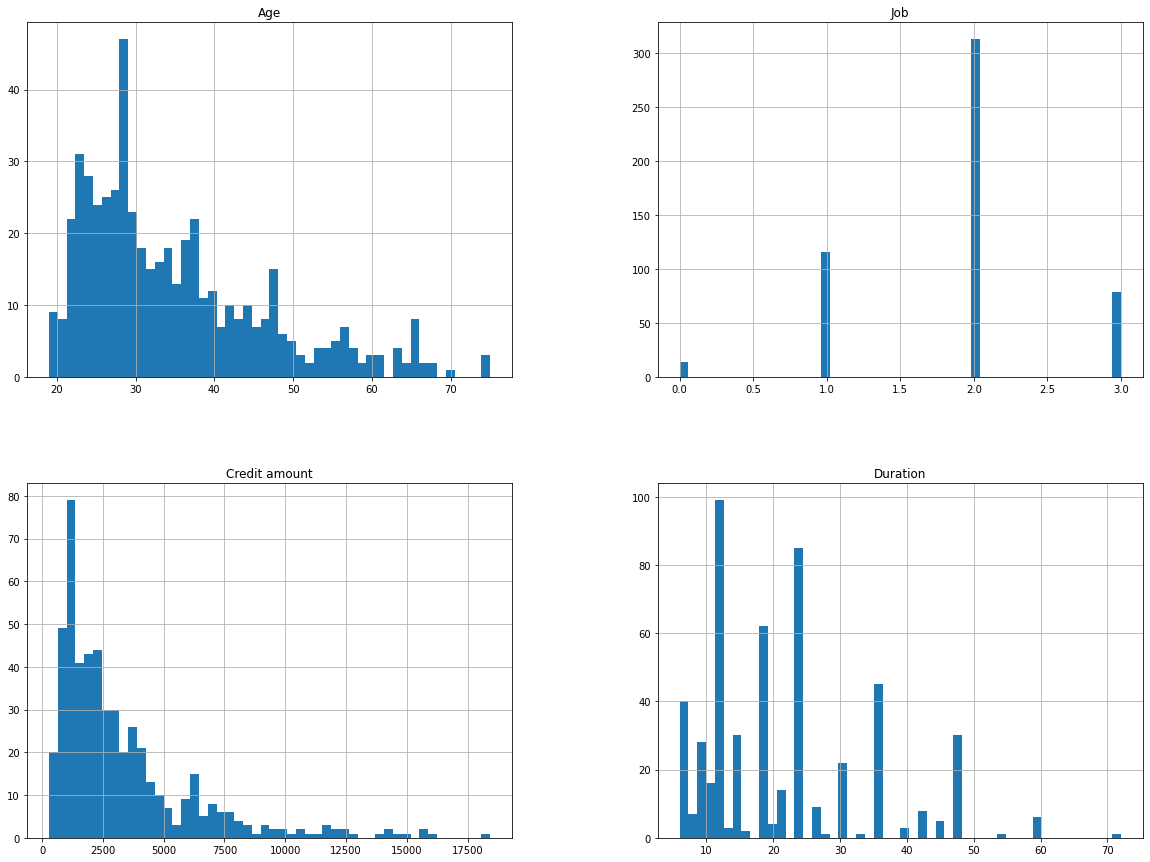

In [6]:
# Histogram of the numerical attributes
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20, 15))
plt.show()

Observations:

Most of the people in the dataset are younger (between 20 and 40)

The vast majority of people have a "skilled" job

Most of the people have a credit amount of less than 5000

Credit duration is pretty scattered but mostly in the range of 10 - 25

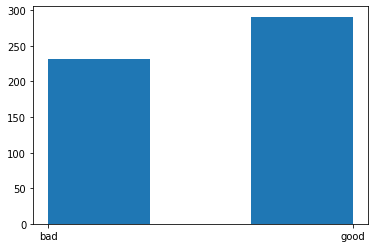

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [7]:
# Histogram of the risk attribute
plt.hist(data['Risk'], bins = 3)
plt.show()
data

Observation:
There are about twice as many people with good credit than people with bad credit

**Split the data into training and test sets such that 20% of the dataset will be used as the test set. Make sure that the test set remains consistent across multiple runs. Remember not to touch the test set until the very last step.**

In [8]:
from sklearn.model_selection import train_test_split
data["Risk"].replace(to_replace = "good", value = 1, inplace = True)
data["Risk"].replace(to_replace = "bad", value = 0, inplace = True)
x, y = data[["Age", "Job", "Credit amount", "Duration"]], data[["Risk"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
7,35,male,3,rent,little,moderate,6948,36,car,1
9,28,male,3,own,little,moderate,5234,30,car,0
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,1
993,30,male,3,own,little,little,3959,36,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


## 2. Get the data

**Visualize the data. Choose at least one pair of features. Plot a scatter plot of this pair of features. Use different colors for different types of Risk. Are good VS bad risk linearly separable based on your chosen pair of features?**

In [9]:
good_credit = data[data['Risk'] > 0]
bad_credit = data[data['Risk'] < 1]

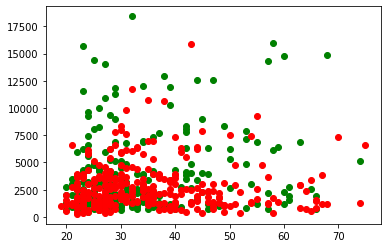

In [10]:
plt.scatter(bad_credit["Age"], bad_credit["Credit amount"], color = 'green')
plt.scatter(good_credit["Age"], good_credit["Credit amount"], color = 'red')
plt.show()

Based on the two features that I chose (Age and Credit amount), good risk vs bad risk are not linearly separable.

**Perform feature selection and explain the choice of your selected features. Make sure that you consider both numerical and non-numerical features in the analysis and clearly explain the rationale behind selecting these features.**

In [11]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
7,35,male,3,rent,little,moderate,6948,36,car,1
9,28,male,3,own,little,moderate,5234,30,car,0
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,1
993,30,male,3,own,little,little,3959,36,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [12]:
data["Sex"].replace(to_replace = "male", value = 1, inplace = True)
data["Sex"].replace(to_replace = "female", value = 0, inplace = True)
data["Housing"].replace(to_replace = "own", value = 2, inplace = True)
data["Housing"].replace(to_replace = "free", value = 1, inplace = True)
data["Housing"].replace(to_replace = "rent", value = 0, inplace = True)
data["Saving accounts"].replace(to_replace = "rich", value = 3, inplace = True)
data["Saving accounts"].replace(to_replace = "quite rich", value = 2, inplace = True)
data["Saving accounts"].replace(to_replace = "moderate", value = 1, inplace = True)
data["Saving accounts"].replace(to_replace = "little", value = 0, inplace = True)
data["Checking account"].replace(to_replace = "rich", value = 3, inplace = True)
data["Checking account"].replace(to_replace = "quite rich", value = 2, inplace = True)
data["Checking account"].replace(to_replace = "moderate", value = 1, inplace = True)
data["Checking account"].replace(to_replace = "little", value = 0, inplace = True)
data["Purpose"].replace(to_replace = "car", value = 7, inplace = True)
data["Purpose"].replace(to_replace = "furniture/equipment", value = 6, inplace = True)
data["Purpose"].replace(to_replace = "radio/TV", value = 5, inplace = True)
data["Purpose"].replace(to_replace = "domestic appliances", value = 4, inplace = True)
data["Purpose"].replace(to_replace = "repairs", value = 3, inplace = True)
data["Purpose"].replace(to_replace = "education", value = 2, inplace = True)
data["Purpose"].replace(to_replace = "business", value = 1, inplace = True)
data["Purpose"].replace(to_replace = "vacation/others", value = 0, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               522 non-null    int64
 1   Sex               522 non-null    int64
 2   Job               522 non-null    int64
 3   Housing           522 non-null    int64
 4   Saving accounts   522 non-null    int64
 5   Checking account  522 non-null    int64
 6   Credit amount     522 non-null    int64
 7   Duration          522 non-null    int64
 8   Purpose           522 non-null    int64
 9   Risk              522 non-null    int64
dtypes: int64(10)
memory usage: 44.9 KB


C:\Users\justi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


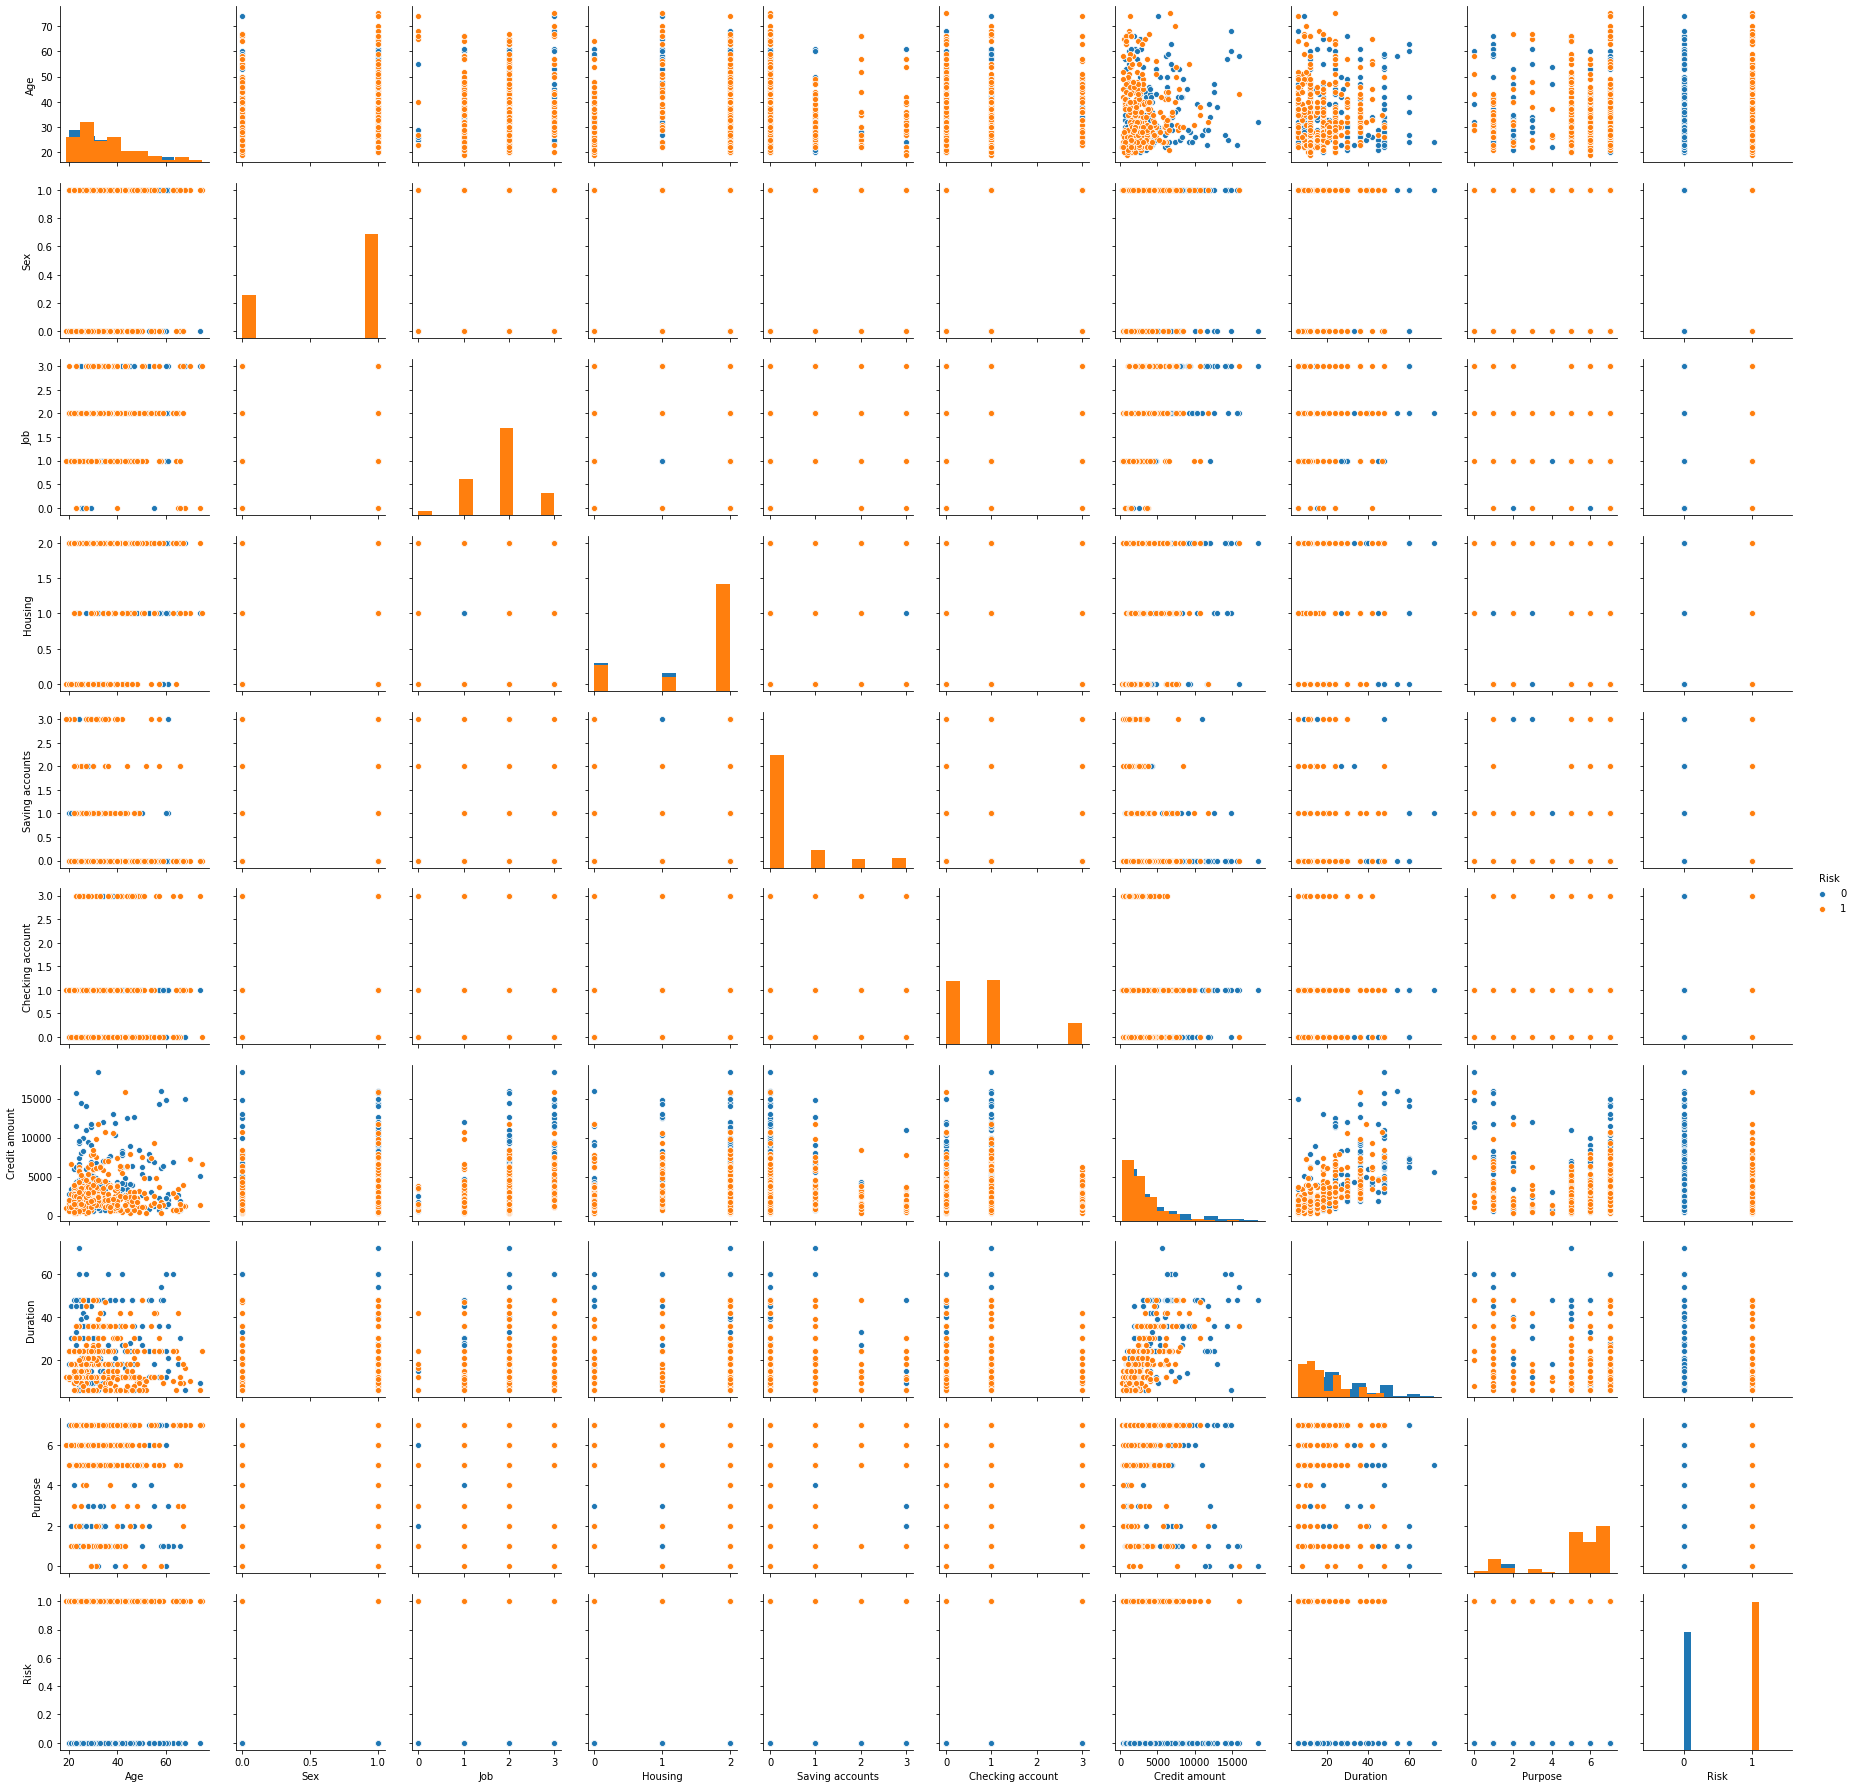

In [13]:
import seaborn as sns
sns.pairplot(data.loc[:,["Age",
                         "Sex",
                         "Job",
                         "Housing",
                         "Saving accounts",
                         "Checking account",
                         "Credit amount",
                         "Duration",
                         "Purpose",
                         "Risk"
                        ]
                     ],
            hue = "Risk", diag_kind = "hist")

Based on looking at the plot of the checking account vs credit amount, I believe these two features are the best features that will predict good risk vs bad. It was quite difficult since none of the plots were obvious. When looking at the plot that has the checking account on the x axis and the credit amount on the y axis, all of the orange points are on the right and bottom while the blue points are towards the top left. This shows some correlation between good risk and bad risk. Some of the other plots that show some correlation are those involving Age, Job, and duration. The features that I have selected are checking account, credit amount, Age, Job, and duration.

## 4. Prepare the data for Machine Learning Algorithms

**Construct the features X and labels y that will be used to train your model. Use only the features selected in Step 3. Apply all the necessary transformations to get your data ready for machine learning algorithms. Explain how the transformations you choose address the following data preparation steps.**

**Handling missing features**

**Handling text and categorical attributes**

**Feature scaling**

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

risk_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])

data_tr = risk_pipeline.fit_transform(data)

data = data.dropna()
features = ['Age',
            'Job',
            'Checking account',
            'Credit amount',
            'Duration']
X = data[features]
Y = (data['Risk'] == '1')

# imputer is to fill in missing values with the median of that feature
# text attributes were already converted to integer
# std_scaler is for feature scaling

## 5. Explore many different models and shortlist the best ones:

**Pick at least 2 classifiers and train them. At least one classifier should be either RandomForestClassifier or SVM Classifier (LinearSVC from sklearn.svm or SVC from sklearn.svm).**

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(max_depth=2, random_state=0)
rfc_clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train.values.ravel())

GaussianNB()

**Report the performance of each classifier based on the performance measure(s) you pick in Step 1.**

The performance measures from step 1 are training accuracy, cross-validation accuracy, precision, and F1 score.

In [17]:
# Training accuracy
from sklearn import metrics

# Random Forest Classifier
print(metrics.accuracy_score(y.values.ravel(), rfc_clf.predict(x)))

# Naive Bayes
print(metrics.accuracy_score(y.values.ravel(), gnb_clf.predict(x)))

0.6379310344827587
0.6149425287356322


In [18]:
# Cross-Validation Accuracy
from sklearn.model_selection import cross_val_score

# Random Forest Classifier
print(cross_val_score(rfc_clf, x, y.values.ravel(), cv = 3, scoring = "accuracy"))

# Naive Bayes
print(cross_val_score(rfc_clf, x, y.values.ravel(), cv = 3, scoring = "accuracy"))

[0.59770115 0.5862069  0.62643678]
[0.59770115 0.5862069  0.62643678]


In [19]:
# Precision Score
from sklearn.metrics import precision_score

# Random Forest Classifier
print("Precision Score:", precision_score(y, rfc_clf.predict(x)))

# Naive Bayes
print("Precision Score:", precision_score(y, gnb_clf.predict(x)))

Precision Score: 0.6186046511627907
Precision Score: 0.6147959183673469


In [20]:
# F1 Score
from sklearn.metrics import f1_score

# Random Forest Classifier
print("F1 Score:", f1_score(y, rfc_clf.predict(x)))

# Naive Bayes
print("F1 Score:", f1_score(y, gnb_clf.predict(x)))

F1 Score: 0.737864077669903
F1 Score: 0.705710102489019


**Pick the best classifier and explain your choice.**

The best classifier is the Random Forest Classifier score since it had the highest F1 score between the classifers that I used.

## 6. Fine-tune your model:

**Pick at least one hyperparameter of the chosen model from Step 5 and try a different value. Retrain the model with the new value of the chosen hyperparameter.**

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [22]:
rfc_clf = RandomForestClassifier(max_depth=2, random_state=0)
rfc_clf.fit(x_train, y_train.values.ravel())

gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train.values.ravel())

GaussianNB()

**Compare the performance of the new model with the previous one. Pick the better model as your system.**

In [23]:
# F1 Score

# Random Forest Classifier
print("F1 Score:", f1_score(y, rfc_clf.predict(x)))

# Naive Bayes
print("F1 Score:", f1_score(y, gnb_clf.predict(x)))

F1 Score: 0.72
F1 Score: 0.7048458149779735


The F1 score is lower this time meaning that the previous model was better.

In [24]:
# Revert back to old model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
rfc_clf = RandomForestClassifier(max_depth=2, random_state=0)
rfc_clf.fit(x_train, y_train.values.ravel())

gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train.values.ravel())

GaussianNB()

In [25]:
# F1 Score of test set

# Random Forest Classifier
print("F1 Score:", f1_score(y_test, rfc_clf.predict(x_test)))

# Naive Bayes
print("F1 Score:", f1_score(y_test, gnb_clf.predict(x_test)))

F1 Score: 0.6463414634146342
F1 Score: 0.6303030303030304
